# Лекция 4. Статистические тесты

Хватит просто смотреть на датафрейм, пора понять данные : оценить взаимосвязи между переменными, определить их значимость и репрезентативность. Статистика — ключ к раскрытию ваших данных. В этой статье мы поговорим о статистике в Python, какие существуют библиотеки, и как их применять на реальных данных.

In [7]:
import pandas as pd
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Предобработка данных

In [8]:
#переводим пол в бинарный признак
titanic['Sex']=titanic['Sex'].map({'male':1,'female':0})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#кодируем категориальные переменные
titanic=pd.get_dummies(titanic,columns=['Pclass','Embarked'])
titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


In [10]:
#удаляем ненужные признаки
features=titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
features.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


## Стат. тесты

In [ ]:
# дисперсия, стандартное отклонение?

In [ ]:
# репрезентативность выборки?

Прекрасный курс по статистике - https://stepik.org/course/76/syllabus

Прекрасные книги для погружения в статистику - "Статистика и котики", "Голая статистика"

Нормальный закон распределения является простым и удобным для дальнейшего исследования. Чтобы проверить имеет ли тот или иной атрибут нормальное распределение, можно воспользоваться двумя критериями Python-библиотеки scipy с модулем stats.

В основе проверки на “нормальность” лежит проверка гипотез. Нулевая гипотеза — данные распределены нормально, альтернативная гипотеза — данные не имеют нормального распределения.

Проведем первый критерий Шапиро-Уилка, возвращающий значение вычисленной статистики и p-значение. В качестве критического значения в большинстве случаев берется 0.05. При p-значении меньше 0.05 мы вынуждены отклонить нулевую гипотезу.

In [13]:
#тест на нормальность
from scipy import stats
stat, p = stats.shapiro(features['Fare'])
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Отклонить гипотезу о нормальности


Более подробно поговорим о тестах, когда будем отбирать признаки для моделей машинного обучения

## Корреляция

Простыми словами корреляция – это взаимосвязь двух или нескольких случайных параметров. Когда одна величина растет или уменьшается, другая тоже изменяется.

In [17]:
from IPython.display import Image
Image(url='https://i2.wp.com/advi.club/uploads/posts/2018-06/1528301810_korelacionniy-analiz.jpg')

In [19]:
Image(url='https://ktonanovenkogo.ru/image/koeffitcient-korreliatcii-formula.jpg')

In [20]:
Image(url='https://i2.wp.com/advi.club/uploads/posts/2018-06/1528301810_korelacionniy-analiz.jpg')

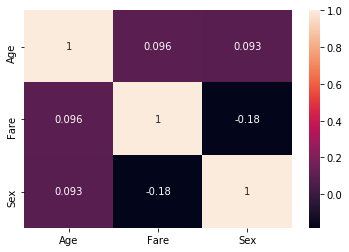

In [15]:
import seaborn as sns
cols = ['Age','Fare','Sex']
hm = sns.heatmap(features[cols].corr(),
                 cbar=True,
                 annot=True)